# Marketplace Feature Table 

Given Problem:

Your Client ComZ is an ecommerce company. The company wants to focus on targeting the right customers  with the right products to increase overall revenue and conversion rate.

To target the right customers with the right products, they need to build an ML model for marketing based on user interaction with products in the past like number of views,  most viewed product, number of activities of user, vintage of user and others. 

ComZ has contacted the Data Science and Engineering team to use this information to fuel the personalized advertisements, email marketing campaigns, or special offers on the landing and category pages of the company's website.

You, being a part of the data engineering team, are expected to “Develop input features”  for the efficient marketing model given the Visitor log data and User Data.

In the current case, you are supposed to generate an input feature set as on 28-May-2018. So, the visitor table is from 07-May-2018 to 27-May-2018.

# Loading given datasets and sample to have a overview of the dataset.

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visitor Table
data_visitor_log=pd.read_csv("VisitorLogsData.csv")
# User Table
data_user=pd.read_csv("UserTable.csv")

In [3]:
data_visitor_log.shape

(6588000, 9)

In [4]:
data_visitor_log.head(20)

,webClientID,VisitDateTime,ProductID,UserID,Activity,Browser,OS,City,Country
0,WI10000050298,2018-05-07 04:28:45.970,pr100631,NaN,NaN,Chrome Mobile,Android,Chennai,India
1,WI10000025922,2018-05-13 07:26:04.964,pr100707,NaN,NaN,Chrome,Windows,NaN,Taiwan
2,WI100000204522,2018-05-11 11:43:42.832,pr100030,NaN,click,Chrome,windows,Gurgaon,India
3,WI10000011974,2018-05-13 15:20:23.436,Pr100192,NaN,CLICK,Chrome,Windows,,
4,WI100000441953,2018-05-08 20:44:25.238,Pr100762,NaN,click,Chrome,mac os x,Iselin,United States
5,WI10000042224,2018-05-24 13:10:32.908,pr100109,NaN,click,Chrome,Mac OS X,NaN,Taiwan
6,WI100000532584,2018-05-23 14:52:18.564,pr100020,NaN,click,Opera,Windows,Baku,Azerbaijan
7,WI100000377250,2018-05-13 03:13:21.958,Pr101495,NaN,CLICK,Chrome,Windows,Bayan Lepas,Malaysia
8,WI10000031378,2018-05-10 02:04:54.844,Pr100013,NaN,click,Chrome,Windows,Chakwal,Pakistan
9,WI100000278874,2018-05-25 13:40:03.094,Pr101701,NaN,PAGELOAD,Chrome,Windows,,


In [5]:
data_visitor_log.describe()

,webClientID,VisitDateTime,ProductID,UserID,Activity,Browser,OS,City,Country
count,6588000,5929085,6060863,650695,5698554,6588000,6588000,4422169,6190307
unique,1091455,5482669,17459,34050,4,82,30,26260,18914
top,WI10000057,2018-05-21 04:18:05.465,Pr100017,U100347,click,Chrome,Windows,Mumbai,India
freq,8877,5,103845,14671,3041039,4709203,3948358,259651,2360175


In [6]:
# Only 34050 Unique IDs are present. 

In [7]:
data_user.shape

(34050, 3)

In [8]:
data_user.head(20)

,UserID,Signup Date,User Segment
0,U133159,2018-04-14 07:01:16.202607+00:00,C
1,U129368,2017-12-02 09:38:41.584270+00:00,B
2,U109654,2013-03-19 11:38:55+00:00,B
3,U108998,2018-01-18 08:29:51.627954+00:00,C
4,U131393,2018-03-27 08:05:28.806800+00:00,B
5,U101889,2018-01-24 12:50:00.225811+00:00,B
6,U113233,2017-03-18 09:27:53.079335+00:00,B
7,U115728,2017-08-18 11:40:29.685549+00:00,B
8,U132899,2018-03-14 08:32:32.906136+00:00,B
9,U107492,2018-04-10 20:42:50.794037+00:00,B


In [9]:
data_user.describe()

,UserID,Signup Date,User Segment
count,34050,34050,34050
unique,34050,34038,3
top,U114038,2014-02-03 15:17:28.723279+00:00,B
freq,1,13,17051


In [10]:
# Sample FIle to understand required output features better
data_sample=pd.read_csv("sample_submission_M7Vpb9f.csv")
data_sample.head()

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
0,U100002,1,1,1,P12345,OS12345,P12345,1,1
1,U100003,1,1,1,P12345,OS12345,P12345,1,1
2,U100004,1,1,1,P12345,OS12345,P12345,1,1
3,U100005,1,1,1,P12345,OS12345,P12345,1,1
4,U100006,1,1,1,P12345,OS12345,P12345,1,1


In [11]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34050 entries, 0 to 34049
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   UserID                         34050 non-null  object
 1   No_of_days_Visited_7_Days      34050 non-null  int64 
 2   No_Of_Products_Viewed_15_Days  34050 non-null  int64 
 3   User_Vintage                   34050 non-null  int64 
 4   Most_Viewed_product_15_Days    34050 non-null  object
 5   Most_Active_OS                 34050 non-null  object
 6   Recently_Viewed_Product        34050 non-null  object
 7   Pageloads_last_7_days          34050 non-null  int64 
 8   Clicks_last_7_days             34050 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.3+ MB


# Data Cleaning and Processing

# Let's see if we can impute missing User IDs using Web Client IDs

# Assumption: 1 webClientID can only have 1 User ID. This can help in imputing Null values where UserIDs are missing

web={}  #Dictionary to store webClientID as Keys and List of UserIds as values. 

        #If there are more than 1 User ID for a particular webClientID, Assumtion is False
        
val=True

for j in range(len(data_visitor_log)):

        if data_visitor_log.iloc[j]['webClientID'] not in web.keys():
        
            web[data_visitor_log.iloc[j]['webClientID']]=[data_visitor_log.iloc[j]['UserID']]
            
        else:
        
            if data_visitor_log.iloc[j]['UserID'] not in web[data_visitor_log.iloc[j]['webClientID']]:
            
                val=False
                
                print(data_visitor_log.iloc[j]['webClientID'])
                
                break
                
print("Assumption is:",val)

# This gave the output as True - 

# However, none of the Webclient IDs have UserID  other than NaN.

Treating this block as a markdown to avoid delays in code execution, as it did not give fruitful results.

In [12]:
# I will be using UserID Column to map/merge the 2 datasets. So, Let's remove rows without USerID from data_visitor_log
data_visitor_registered=data_visitor_log[data_visitor_log['UserID'].isnull()==False]
print(data_visitor_registered.shape)
data_visitor_registered.head()

(650695, 9)


,webClientID,VisitDateTime,ProductID,UserID,Activity,Browser,OS,City,Country
14,WI100000112772,1526366895249000000,Pr100017,U106593,click,Chrome Mobile,Android,,
21,WI1000009977,1527058921790000000,Pr101008,U108297,NaN,Chrome Mobile,Android,Delhi,India
23,WI100000223826,2018-05-10 06:28:53.391,Pr100241,U132443,NaN,Firefox,Windows,NaN,India
24,WI10000021998,2018-05-08 12:40:02.153,pr100495,U134616,click,Chrome,Windows,Cottage Grove,United States
33,WI10000036281,2018-05-11 15:35:43.689,Pr100363,U130784,click,Chrome,Chrome OS,New Delhi,India


In [13]:
data_visitor_registered.columns

Index(['webClientID', 'VisitDateTime', 'ProductID', 'UserID', 'Activity',
       'Browser', 'OS', 'City', 'Country'],
      dtype='object')

In [14]:
data_visitor_registered=data_visitor_registered[['UserID','webClientID', 'VisitDateTime', 'ProductID', 'Activity',
       'Browser', 'OS', 'City', 'Country']]

In [15]:
# Let's add Signup Date, User Segment from User Table to Visitor Table

# I have used left join

df=data_visitor_registered.merge(data_user, on='UserID', how='left')
df.head()

,UserID,webClientID,VisitDateTime,ProductID,Activity,Browser,OS,City,Country,Signup Date,User Segment
0,U106593,WI100000112772,1526366895249000000,Pr100017,click,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
1,U108297,WI1000009977,1527058921790000000,Pr101008,NaN,Chrome Mobile,Android,Delhi,India,2015-05-26 04:52:35.925746+00:00,B
2,U132443,WI100000223826,2018-05-10 06:28:53.391,Pr100241,NaN,Firefox,Windows,NaN,India,2017-09-29 18:26:42.747408+00:00,C
3,U134616,WI10000021998,2018-05-08 12:40:02.153,pr100495,click,Chrome,Windows,Cottage Grove,United States,2017-03-06 15:04:58.375772+00:00,C
4,U130784,WI10000036281,2018-05-11 15:35:43.689,Pr100363,click,Chrome,Chrome OS,New Delhi,India,2017-09-07 18:44:24.168992+00:00,B


In [16]:
df.shape

(650695, 11)

In [17]:
# Let's have a look at the features of a random UserID to see the common features within his various entries.
# I will also use this example to understand and perform all operations & then extend the same logic to the entire data.

df[df['UserID']=='U106593']

,UserID,webClientID,VisitDateTime,ProductID,Activity,Browser,OS,City,Country,Signup Date,User Segment
0,U106593,WI100000112772,1526366895249000000,Pr100017,click,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
14109,U106593,WI100000112772,2018-05-16 06:53:23.737,Pr100241,pageload,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
16039,U106593,WI100000112772,2018-05-15 06:47:49.239,Pr100017,click,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
40491,U106593,WI100000112772,2018-05-16 06:54:26.424,pr100901,PAGELOAD,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
54698,U106593,WI100000112772,2018-05-15 06:47:36.691,Pr100017,CLICK,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
74528,U106593,WI100000112772,2018-05-15 06:48:27.021,pr100219,NaN,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
78201,U106593,WI100000112772,NaN,Pr100017,pageload,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
108809,U106593,WI100000112772,2018-05-15 06:47:04.186,Pr100219,click,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B
121280,U106593,WI100000203515,2018-05-25 10:24:49.610,Pr102651,pageload,Chrome,Windows,,,2017-09-10 15:48:09.451327+00:00,B
141740,U106593,WI100000112772,2018-05-15 06:47:57.298,Pr100017,NaN,Chrome Mobile,Android,,,2017-09-10 15:48:09.451327+00:00,B


In [18]:
df['Activity'].value_counts()

click       316230
pageload    133901
CLICK        79383
PAGELOAD     33424
Name: Activity, dtype: int64

In [19]:
# Need to covert to same case

In [20]:
df['OS'].value_counts()

Windows      431129
Android       83025
Mac OS X      51496
windows       32510
Linux         22373
Ubuntu        12413
android        6159
iOS            4086
mac os x       3764
linux          1647
ubuntu          924
Chrome OS       650
ios             304
Fedora          128
chrome os        59
Tizen            13
fedora           13
tizen             2
Name: OS, dtype: int64

In [21]:
df['Browser'].value_counts()

Chrome                        498641
Chrome Mobile                  85057
Firefox                        33831
Safari                         21076
Opera                           3621
Mobile Safari                   2954
Samsung Internet                1974
Chrome Mobile iOS               1406
Edge                             408
Firefox Mobile                   397
Chrome Mobile WebView            328
Opera Mobile                     275
Coc Coc                          272
Facebook                         147
Yandex Browser                   114
Amazon Silk                       45
UC Browser                        40
Apple Mail                        37
Mobile Safari UI/WKWebView        22
QQ Browser                        18
Chromium                          15
Maxthon                            9
Firefox iOS                        8
Name: Browser, dtype: int64

# Case Conversion

In [22]:
# The easiest task in hand is to change all Product IDs, Activities and to the same case (Let's do Upper)
df['ProductID']=df['ProductID'].str.upper()
df['Activity']=df['Activity'].str.upper()
df['OS']=df['OS'].str.upper()

In [23]:
df['Activity'].value_counts()

CLICK       395613
PAGELOAD    167325
Name: Activity, dtype: int64

In [24]:
df['OS'].value_counts()

WINDOWS      463639
ANDROID       89184
MAC OS X      55260
LINUX         24020
UBUNTU        13337
IOS            4390
CHROME OS       709
FEDORA          141
TIZEN            15
Name: OS, dtype: int64

# Treating and Imputing Null Values

In [25]:
print("Percentage of Null Values")
df.isnull().sum()/650695*100

Percentage of Null Values


UserID            0.000000
webClientID       0.000000
VisitDateTime     9.959044
ProductID         7.985769
Activity         13.486657
Browser           0.000000
OS                0.000000
City             36.287969
Country           6.581732
Signup Date       0.000000
User Segment      0.000000
dtype: float64

In [26]:
# Too many Null Values in City. Dropping City as imputing this might lead to wrong interpretations.
df.drop(['City'],axis=1,inplace=True)
df.head()

,UserID,webClientID,VisitDateTime,ProductID,Activity,Browser,OS,Country,Signup Date,User Segment
0,U106593,WI100000112772,1526366895249000000,PR100017,CLICK,Chrome Mobile,ANDROID,,2017-09-10 15:48:09.451327+00:00,B
1,U108297,WI1000009977,1527058921790000000,PR101008,NaN,Chrome Mobile,ANDROID,India,2015-05-26 04:52:35.925746+00:00,B
2,U132443,WI100000223826,2018-05-10 06:28:53.391,PR100241,NaN,Firefox,WINDOWS,India,2017-09-29 18:26:42.747408+00:00,C
3,U134616,WI10000021998,2018-05-08 12:40:02.153,PR100495,CLICK,Chrome,WINDOWS,United States,2017-03-06 15:04:58.375772+00:00,C
4,U130784,WI10000036281,2018-05-11 15:35:43.689,PR100363,CLICK,Chrome,CHROME OS,India,2017-09-07 18:44:24.168992+00:00,B


In [27]:
df['Country'].value_counts()

India                    401385
United States             26019
                          14242
India Mumbai               7396
United Kingdom             5482
                          ...  
Netherlands The Hague         1
India Karjat                  1
United States Woxall          1
United States Durham          1
Tunisia Siliana               1
Name: Country, Length: 2585, dtype: int64

In [28]:
# Dropping Country as it doesn't seem to be contributing to the required features, and contains 2585 different variants
df.drop(['Country'],axis=1,inplace=True)

Percentage of Null Values


UserID            0.000000
webClientID       0.000000
VisitDateTime     9.959044
ProductID         7.985769
Activity         13.486657
Browser           0.000000
OS                0.000000
Signup Date       0.000000
User Segment      0.000000
dtype: float64

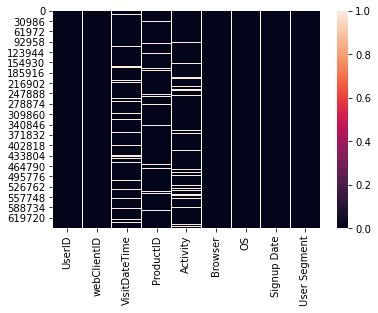

In [29]:
print("Percentage of Null Values")
sns.heatmap(df.isnull())
df.isnull().sum()/650695*100

In [30]:
# I am checking top 20 Dates and then using them as random inputs for Date Null Values
d=dict(df['VisitDateTime'].str[:10].value_counts().head(10))
print(d)
list(d.keys())

{'2018-05-07': 39850, '2018-05-08': 31395, '2018-05-21': 31096, '2018-05-22': 31095, '2018-05-23': 29726, '2018-05-25': 28141, '2018-05-24': 25602, '2018-05-09': 24772, '2018-05-14': 24450, '2018-05-26': 24009}


['2018-05-07',
 '2018-05-08',
 '2018-05-21',
 '2018-05-22',
 '2018-05-23',
 '2018-05-25',
 '2018-05-24',
 '2018-05-09',
 '2018-05-14',
 '2018-05-26']

In [31]:
# Imputing Visit Time with top 20 - random values of same column as we see that we can't directly replace with mode.
df["VisitDateTime"] = df["VisitDateTime"].fillna(np.random.choice(list(d.keys())))

In [32]:
# Imputing the remaining features with modes
imp=["ProductID","Activity"]
for col in imp:
    df[col].fillna(df[col].mode().iloc[0],inplace=True)

Percentage of Null Values


UserID           0.0
webClientID      0.0
VisitDateTime    0.0
ProductID        0.0
Activity         0.0
Browser          0.0
OS               0.0
Signup Date      0.0
User Segment     0.0
dtype: float64

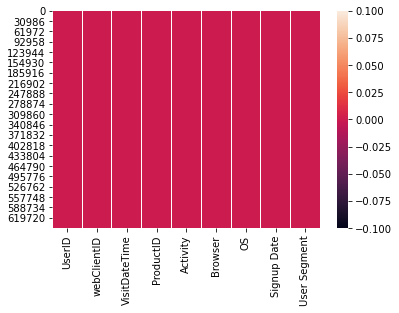

In [33]:
print("Percentage of Null Values")
sns.heatmap(df.isnull())
df.isnull().sum()/650695*100

# Handling Date Time Columns

In [34]:
# Let's fix the Date Columns before moving ahead
# From Signup Date, there is only one format
df['Signup Date']= pd.to_datetime(df['Signup Date'])  # Converted to Timestamp

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650695 entries, 0 to 650694
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   UserID         650695 non-null  object             
 1   webClientID    650695 non-null  object             
 2   VisitDateTime  650695 non-null  object             
 3   ProductID      650695 non-null  object             
 4   Activity       650695 non-null  object             
 5   Browser        650695 non-null  object             
 6   OS             650695 non-null  object             
 7   Signup Date    650695 non-null  datetime64[ns, UTC]
 8   User Segment   650695 non-null  object             
dtypes: datetime64[ns, UTC](1), object(8)
memory usage: 49.6+ MB


In [36]:
df.head()

,UserID,webClientID,VisitDateTime,ProductID,Activity,Browser,OS,Signup Date,User Segment
0,U106593,WI100000112772,1526366895249000000,PR100017,CLICK,Chrome Mobile,ANDROID,2017-09-10 15:48:09.451327+00:00,B
1,U108297,WI1000009977,1527058921790000000,PR101008,CLICK,Chrome Mobile,ANDROID,2015-05-26 04:52:35.925746+00:00,B
2,U132443,WI100000223826,2018-05-10 06:28:53.391,PR100241,CLICK,Firefox,WINDOWS,2017-09-29 18:26:42.747408+00:00,C
3,U134616,WI10000021998,2018-05-08 12:40:02.153,PR100495,CLICK,Chrome,WINDOWS,2017-03-06 15:04:58.375772+00:00,C
4,U130784,WI10000036281,2018-05-11 15:35:43.689,PR100363,CLICK,Chrome,CHROME OS,2017-09-07 18:44:24.168992+00:00,B


In [37]:
# Removing Time-zone to avoid mix-up
df['Signup Date'] = df['Signup Date'].dt.tz_convert(None)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650695 entries, 0 to 650694
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   UserID         650695 non-null  object        
 1   webClientID    650695 non-null  object        
 2   VisitDateTime  650695 non-null  object        
 3   ProductID      650695 non-null  object        
 4   Activity       650695 non-null  object        
 5   Browser        650695 non-null  object        
 6   OS             650695 non-null  object        
 7   Signup Date    650695 non-null  datetime64[ns]
 8   User Segment   650695 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 49.6+ MB


In [39]:
import time
from datetime import datetime
from datetime import date
present_date=datetime.strptime('2018-05-28','%Y-%m-%d')
# Defined Present Date as 28th May, 2018 as given in the problem.

In [40]:
present_date=pd.to_datetime(present_date) # Converting to same Timestamp format

In [41]:
present_date

Timestamp('2018-05-28 00:00:00')

In [42]:
# User VIntage can be calculated by subtracting each date from present date and extracting the day
df['User_Vintage']=df['Signup Date'].apply(lambda x: (present_date-x).days)

In [43]:
df.head()

,UserID,webClientID,VisitDateTime,ProductID,Activity,Browser,OS,Signup Date,User Segment,User_Vintage
0,U106593,WI100000112772,1526366895249000000,PR100017,CLICK,Chrome Mobile,ANDROID,2017-09-10 15:48:09.451327,B,259
1,U108297,WI1000009977,1527058921790000000,PR101008,CLICK,Chrome Mobile,ANDROID,2015-05-26 04:52:35.925746,B,1097
2,U132443,WI100000223826,2018-05-10 06:28:53.391,PR100241,CLICK,Firefox,WINDOWS,2017-09-29 18:26:42.747408,C,240
3,U134616,WI10000021998,2018-05-08 12:40:02.153,PR100495,CLICK,Chrome,WINDOWS,2017-03-06 15:04:58.375772,C,447
4,U130784,WI10000036281,2018-05-11 15:35:43.689,PR100363,CLICK,Chrome,CHROME OS,2017-09-07 18:44:24.168992,B,262


In [44]:
# Dropping ['Browser','webClientID','Signup Date','User Segment'] as they are not required in the output
df.drop(labels=['Browser','webClientID','Signup Date','User Segment'],axis=1,inplace=True)
df.head()

,UserID,VisitDateTime,ProductID,Activity,OS,User_Vintage
0,U106593,1526366895249000000,PR100017,CLICK,ANDROID,259
1,U108297,1527058921790000000,PR101008,CLICK,ANDROID,1097
2,U132443,2018-05-10 06:28:53.391,PR100241,CLICK,WINDOWS,240
3,U134616,2018-05-08 12:40:02.153,PR100495,CLICK,WINDOWS,447
4,U130784,2018-05-11 15:35:43.689,PR100363,CLICK,CHROME OS,262


# Treating Multiple Date Time Formats

In [45]:
# VisitDateTime has 2 types of formats. I am using the lengths to identify difference and treat them separately.
# As seen from Data, 1st Row is in unix datetime format “1527051855673000000”. Let's find the length.

len(df.iloc[0]['VisitDateTime'])

19

In [46]:
# As seen from Data, 1st Row is in datetime format “2018-05-07 04:28:45.970”. Let's find the length.

len(df.iloc[2]['VisitDateTime'])

23

In [47]:
df['VisitDateTime']=df['VisitDateTime'].apply(lambda x: pd.to_datetime(x) if (len(x)!=19) else x)

In [48]:
df.head()

,UserID,VisitDateTime,ProductID,Activity,OS,User_Vintage
0,U106593,1526366895249000000,PR100017,CLICK,ANDROID,259
1,U108297,1527058921790000000,PR101008,CLICK,ANDROID,1097
2,U132443,2018-05-10 06:28:53.391000,PR100241,CLICK,WINDOWS,240
3,U134616,2018-05-08 12:40:02.153000,PR100495,CLICK,WINDOWS,447
4,U130784,2018-05-11 15:35:43.689000,PR100363,CLICK,CHROME OS,262


In [49]:
df['VisitDateTime']=df['VisitDateTime'].apply(lambda x: 
                                              datetime.utcfromtimestamp(int(x)/1000000000).strftime('%Y-%m-%d %H:%M:%S') 
                                              if (type(x)!=pd._libs.tslibs.timestamps.Timestamp) else x)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650695 entries, 0 to 650694
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   UserID         650695 non-null  object        
 1   VisitDateTime  650695 non-null  datetime64[ns]
 2   ProductID      650695 non-null  object        
 3   Activity       650695 non-null  object        
 4   OS             650695 non-null  object        
 5   User_Vintage   650695 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 34.8+ MB


In [51]:
df.head()

,UserID,VisitDateTime,ProductID,Activity,OS,User_Vintage
0,U106593,2018-05-15 06:48:15.000,PR100017,CLICK,ANDROID,259
1,U108297,2018-05-23 07:02:01.000,PR101008,CLICK,ANDROID,1097
2,U132443,2018-05-10 06:28:53.391,PR100241,CLICK,WINDOWS,240
3,U134616,2018-05-08 12:40:02.153,PR100495,CLICK,WINDOWS,447
4,U130784,2018-05-11 15:35:43.689,PR100363,CLICK,CHROME OS,262


In [52]:
# Testing if date entered by me and date in the dataset are compatible and working.

(present_date-df.iloc[0]['VisitDateTime']).days

12

In [53]:
df.iloc[0]['VisitDateTime'].day #Testing

15

In [54]:
# Adding Days Column, to identify unique days.
df['VisitDay']=df['VisitDateTime'].apply(lambda x: x.day)

# Let's Add Days_Since_Visit Column to give better filtering options later on

df['Days_Since_Visit']=df['VisitDay'].apply(lambda x: 28-x)

df.head()

,UserID,VisitDateTime,ProductID,Activity,OS,User_Vintage,VisitDay,Days_Since_Visit
0,U106593,2018-05-15 06:48:15.000,PR100017,CLICK,ANDROID,259,15,13
1,U108297,2018-05-23 07:02:01.000,PR101008,CLICK,ANDROID,1097,23,5
2,U132443,2018-05-10 06:28:53.391,PR100241,CLICK,WINDOWS,240,10,18
3,U134616,2018-05-08 12:40:02.153,PR100495,CLICK,WINDOWS,447,8,20
4,U130784,2018-05-11 15:35:43.689,PR100363,CLICK,CHROME OS,262,11,17


# Creating Input Features Table

In [55]:
data_sample.columns

# Identifying column names to create an empty DataFrame

Index(['UserID', 'No_of_days_Visited_7_Days', 'No_Of_Products_Viewed_15_Days',
       'User_Vintage', 'Most_Viewed_product_15_Days', 'Most_Active_OS',
       'Recently_Viewed_Product', 'Pageloads_last_7_days',
       'Clicks_last_7_days'],
      dtype='object')

In [56]:
input_feature=pd.DataFrame(columns=['UserID', 'No_of_days_Visited_7_Days', 'No_Of_Products_Viewed_15_Days',
       'User_Vintage', 'Most_Viewed_product_15_Days', 'Most_Active_OS',
       'Recently_Viewed_Product', 'Pageloads_last_7_days',
       'Clicks_last_7_days'])

# 1. UserID: Unique ID of the registered user

In [57]:
# UserID Column can be filled by adding all unique elements from df table, which was created by joining the 2 tables and cleaning
input_feature['UserID']=df['UserID'].unique()

# 2. User_Vintage: Vintage (In Days) of the user as of today

Already have this calculated. Need to aggregate and map

In [58]:
# Preparing required data to map to the final table. Here all values for a given user are same, so max will return the same value
a=df.groupby(['UserID'])['User_Vintage'].aggregate('max')

In [59]:
a

UserID
U100002      52
U100003    1020
U100004     340
U100005     680
U100006      54
           ... 
U136960     754
U136961      59
U136963    1419
U136964     494
U136965     242
Name: User_Vintage, Length: 34050, dtype: int64

In [60]:
input_feature['User_Vintage']=input_feature['UserID'].map(a)

In [61]:
input_feature.head()

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
0,U106593,NaN,NaN,259,NaN,NaN,NaN,NaN,NaN
1,U108297,NaN,NaN,1097,NaN,NaN,NaN,NaN,NaN
2,U132443,NaN,NaN,240,NaN,NaN,NaN,NaN,NaN
3,U134616,NaN,NaN,447,NaN,NaN,NaN,NaN,NaN
4,U130784,NaN,NaN,262,NaN,NaN,NaN,NaN,NaN


# 3. Most_Active_OS: Most Frequently used OS by the User

In [62]:
# Preparing required data to map to the final table.
b=df.groupby(['UserID'])['OS'].aggregate('max')

In [63]:
input_feature['Most_Active_OS']=input_feature['UserID'].map(b)

In [64]:
input_feature.head()

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
0,U106593,NaN,NaN,259,NaN,WINDOWS,NaN,NaN,NaN
1,U108297,NaN,NaN,1097,NaN,WINDOWS,NaN,NaN,NaN
2,U132443,NaN,NaN,240,NaN,WINDOWS,NaN,NaN,NaN
3,U134616,NaN,NaN,447,NaN,WINDOWS,NaN,NaN,NaN
4,U130784,NaN,NaN,262,NaN,CHROME OS,NaN,NaN,NaN


# 4. No_of_days_Visited_7_Days: How many days a user was active on platform in the last 7 days.

In [65]:
# Let's create a Dataframe that contains only last 7 days data. we need data from 21 to 27.
df_7_days=df[df['Days_Since_Visit']<=7]

c=df_7_days.groupby(['UserID'])['VisitDay'].unique()

In [66]:
c

UserID
U100003                        [25]
U100004                        [21]
U100005                        [26]
U100006                        [21]
U100008    [26, 24, 21, 23, 27, 25]
                     ...           
U119707                        [21]
U119708                        [21]
U119709                        [21]
U119711                        [21]
U119712                        [21]
Name: VisitDay, Length: 16172, dtype: object

In [67]:
c=dict(c)

In [68]:
c_count={} # Empty dictionary to store UserID as Key and Count of Days as Values
for i in c.keys():
    c_count[i]=len(c[i])
c_count['U100008'] # Example to verify

6

In [69]:
input_feature['No_of_days_Visited_7_Days']=input_feature['UserID'].map(c_count)

In [70]:
input_feature.head()

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
0,U106593,2.0,NaN,259,NaN,WINDOWS,NaN,NaN,NaN
1,U108297,3.0,NaN,1097,NaN,WINDOWS,NaN,NaN,NaN
2,U132443,NaN,NaN,240,NaN,WINDOWS,NaN,NaN,NaN
3,U134616,NaN,NaN,447,NaN,WINDOWS,NaN,NaN,NaN
4,U130784,NaN,NaN,262,NaN,CHROME OS,NaN,NaN,NaN


In [71]:
# Replacing 'NaN' with 0 as there are 0 days that they visited in the last 7 days.
input_feature['No_of_days_Visited_7_Days'].fillna(0,inplace=True)
input_feature.head()

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
0,U106593,2.0,NaN,259,NaN,WINDOWS,NaN,NaN,NaN
1,U108297,3.0,NaN,1097,NaN,WINDOWS,NaN,NaN,NaN
2,U132443,0.0,NaN,240,NaN,WINDOWS,NaN,NaN,NaN
3,U134616,0.0,NaN,447,NaN,WINDOWS,NaN,NaN,NaN
4,U130784,0.0,NaN,262,NaN,CHROME OS,NaN,NaN,NaN


# 5. No_Of_Products_Viewed_15_Days

In [72]:
# Let's create a Dataframe that contains only last 15 days data,taking less than 15 and not equalto as we need data from 13 to 27.
df_15_days=df[df['Days_Since_Visit']<=15]

In [73]:
d=df_15_days.groupby(['UserID'])['ProductID'].unique()
d # Returns a list of unique Products against every user

UserID
U100002                                 [PR100258, PR101097]
U100003                       [PR101042, PR100079, PR100178]
U100004    [PR100142, PR101042, PR101554, PR100204, PR100...
U100005             [PR100234, PR102072, PR101249, PR100430]
U100006                                           [PR101111]
                                 ...                        
U136940                                           [PR100432]
U136949                                 [PR100083, PR101042]
U136956                                           [PR100312]
U136959                                 [PR100551, PR100102]
U136963                                           [PR100102]
Name: ProductID, Length: 29086, dtype: object

In [74]:
d=dict(d) # Saved as Dictionary so that I can iterate across product-lists (values) against users (keys)
d['U106593'] # Example

array(['PR100017', 'PR100241', 'PR100901', 'PR100219', 'PR102651',
       'PR101042', 'PR100145', 'PR100166', 'PR103384', 'PR100312'],
      dtype=object)

In [75]:
e={} # Empty dictionary to store UserID as Key and Count of Products as Values
for i in d.keys():
    e[i]=len(d[i])
e['U106593'] # Example to verify

10

In [76]:
input_feature['No_Of_Products_Viewed_15_Days']=input_feature['UserID'].map(e)

In [77]:
input_feature

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
0,U106593,2.0,10.0,259,NaN,WINDOWS,NaN,NaN,NaN
1,U108297,3.0,8.0,1097,NaN,WINDOWS,NaN,NaN,NaN
2,U132443,0.0,1.0,240,NaN,WINDOWS,NaN,NaN,NaN
3,U134616,0.0,1.0,447,NaN,WINDOWS,NaN,NaN,NaN
4,U130784,0.0,3.0,262,NaN,CHROME OS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
34045,U120504,0.0,1.0,517,NaN,ANDROID,NaN,NaN,NaN
34046,U121518,0.0,1.0,631,NaN,MAC OS X,NaN,NaN,NaN
34047,U119259,1.0,1.0,51,NaN,WINDOWS,NaN,NaN,NaN
34048,U127061,0.0,1.0,88,NaN,ANDROID,NaN,NaN,NaN


In [78]:
# Replacing 'NaN' with 0 as there are 0 products that they viewed in the last 15 days.
input_feature['No_Of_Products_Viewed_15_Days'].fillna(0,inplace=True)
input_feature.head()

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
0,U106593,2.0,10.0,259,NaN,WINDOWS,NaN,NaN,NaN
1,U108297,3.0,8.0,1097,NaN,WINDOWS,NaN,NaN,NaN
2,U132443,0.0,1.0,240,NaN,WINDOWS,NaN,NaN,NaN
3,U134616,0.0,1.0,447,NaN,WINDOWS,NaN,NaN,NaN
4,U130784,0.0,3.0,262,NaN,CHROME OS,NaN,NaN,NaN


# 6. Most_Viewed_product_15_Days: 

Most frequently viewed (page loads) product by the user in the last 15 days. If there are multiple products that have a similar number of page loads then , consider the recent one. If a user has not viewed any product in the last 15 days then put it as Product101. 

In [79]:
# Creating Dataframe for <15 Days and Activity type - Page Loads

df_15_page_loads=df[df['Days_Since_Visit']<=15][df['Activity']=='PAGELOAD']
df_15_page_loads.head()

,UserID,VisitDateTime,ProductID,Activity,OS,User_Vintage,VisitDay,Days_Since_Visit
14,U123525,2018-05-17 23:26:51.072,PR101614,PAGELOAD,ANDROID,61,17,11
22,U109651,2018-05-25 17:03:00.226,PR100503,PAGELOAD,WINDOWS,256,25,3
23,U113103,2018-05-21 03:55:35.958,PR100544,PAGELOAD,WINDOWS,130,21,7
25,U117762,2018-05-22 03:40:34.859,PR100281,PAGELOAD,WINDOWS,74,22,6
26,U108207,2018-05-25 20:39:09.000,PR100017,PAGELOAD,WINDOWS,1149,25,3


In [80]:
df_15_page_loads=df_15_page_loads.sort_values('VisitDateTime',ascending=False) # To keep recent first, as max will later return recent one if there is clash.
df_15_page_loads.head()

,UserID,VisitDateTime,ProductID,Activity,OS,User_Vintage,VisitDay,Days_Since_Visit
267971,U104304,2018-05-27 23:59:10.551,PR100275,PAGELOAD,WINDOWS,50,27,1
379526,U104305,2018-05-27 23:57:15.278,PR100025,PAGELOAD,ANDROID,77,27,1
636271,U104296,2018-05-27 23:55:39.057,PR100390,PAGELOAD,WINDOWS,173,27,1
216674,U104296,2018-05-27 23:55:39.057,PR100390,PAGELOAD,WINDOWS,173,27,1
127505,U104309,2018-05-27 23:47:47.478,PR100076,PAGELOAD,MAC OS X,66,27,1


In [81]:
f=df_15_page_loads.groupby(['UserID'])['ProductID'].aggregate('max')
f

UserID
U100002    PR100258
U100003    PR100079
U100004    PR101505
U100005    PR102072
U100006    PR101111
             ...   
U136934    PR100130
U136936    PR100003
U136940    PR100432
U136949    PR100083
U136956    PR100312
Name: ProductID, Length: 24716, dtype: object

In [82]:
input_feature['Most_Viewed_product_15_Days']=input_feature['UserID'].map(f)

In [83]:
input_feature.head(20)

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
0,U106593,2.0,10.0,259,PR103384,WINDOWS,NaN,NaN,NaN
1,U108297,3.0,8.0,1097,PR101030,WINDOWS,NaN,NaN,NaN
2,U132443,0.0,1.0,240,NaN,WINDOWS,NaN,NaN,NaN
3,U134616,0.0,1.0,447,NaN,WINDOWS,NaN,NaN,NaN
4,U130784,0.0,3.0,262,PR100853,CHROME OS,NaN,NaN,NaN
5,U120983,0.0,2.0,77,PR100340,WINDOWS,NaN,NaN,NaN
6,U120287,0.0,19.0,46,PR102152,WINDOWS,NaN,NaN,NaN
7,U124307,0.0,4.0,630,PR101042,MAC OS X,NaN,NaN,NaN
8,U113937,1.0,7.0,159,PR101367,MAC OS X,NaN,NaN,NaN
9,U115735,1.0,22.0,48,PR102323,WINDOWS,NaN,NaN,NaN


In [84]:
input_feature.Most_Viewed_product_15_Days.fillna('Product101',inplace=True)
input_feature.tail()

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
34045,U120504,0.0,1.0,517,PR100430,ANDROID,NaN,NaN,NaN
34046,U121518,0.0,1.0,631,PR100083,MAC OS X,NaN,NaN,NaN
34047,U119259,1.0,1.0,51,PR100102,WINDOWS,NaN,NaN,NaN
34048,U127061,0.0,1.0,88,Product101,ANDROID,NaN,NaN,NaN
34049,U122948,0.0,1.0,373,Product101,WINDOWS,NaN,NaN,NaN


# 7. Recently_Viewed_Product: Most recently viewed (page loads) product by the user.

If a user has not viewed any product then put it as Product101.

In [85]:
df_sorted=df.sort_values('VisitDateTime',ascending=False)
df_sorted

,UserID,VisitDateTime,ProductID,Activity,OS,User_Vintage,VisitDay,Days_Since_Visit
570879,U104303,2018-05-27 23:59:23.729,PR100254,CLICK,WINDOWS,216,27,1
267971,U104304,2018-05-27 23:59:10.551,PR100275,PAGELOAD,WINDOWS,50,27,1
379526,U104305,2018-05-27 23:57:15.278,PR100025,PAGELOAD,ANDROID,77,27,1
636271,U104296,2018-05-27 23:55:39.057,PR100390,PAGELOAD,WINDOWS,173,27,1
216674,U104296,2018-05-27 23:55:39.057,PR100390,PAGELOAD,WINDOWS,173,27,1
...,...,...,...,...,...,...,...,...
500163,U136963,2018-05-07 00:00:12.156,PR100102,CLICK,ANDROID,1419,7,21
257017,U136963,2018-05-07 00:00:11.164,PR100102,CLICK,ANDROID,1419,7,21
314187,U136963,2018-05-07 00:00:10.434,PR101042,CLICK,ANDROID,1419,7,21
275436,U136965,2018-05-07 00:00:07.040,PR100709,PAGELOAD,ANDROID,242,7,21


In [86]:
df_sorted_page_loads=df_sorted[df_sorted.Activity=='PAGELOAD']
df_sorted_page_loads

,UserID,VisitDateTime,ProductID,Activity,OS,User_Vintage,VisitDay,Days_Since_Visit
267971,U104304,2018-05-27 23:59:10.551,PR100275,PAGELOAD,WINDOWS,50,27,1
379526,U104305,2018-05-27 23:57:15.278,PR100025,PAGELOAD,ANDROID,77,27,1
636271,U104296,2018-05-27 23:55:39.057,PR100390,PAGELOAD,WINDOWS,173,27,1
216674,U104296,2018-05-27 23:55:39.057,PR100390,PAGELOAD,WINDOWS,173,27,1
127505,U104309,2018-05-27 23:47:47.478,PR100076,PAGELOAD,MAC OS X,66,27,1
...,...,...,...,...,...,...,...,...
84871,U136963,2018-05-07 00:01:31.872,PR100166,PAGELOAD,ANDROID,1419,7,21
219867,U136963,2018-05-07 00:01:21.195,PR100254,PAGELOAD,ANDROID,1419,7,21
189505,U125268,2018-05-07 00:01:00.677,PR100257,PAGELOAD,WINDOWS,1529,7,21
349299,U128908,2018-05-07 00:00:30.082,PR100355,PAGELOAD,WINDOWS,113,7,21


In [87]:
# Keeping First Occurence in Sorted Table

df_sorted_page_loads = df_sorted_page_loads.drop_duplicates(subset=['UserID'])
df_sorted_page_loads.head()

,UserID,VisitDateTime,ProductID,Activity,OS,User_Vintage,VisitDay,Days_Since_Visit
267971,U104304,2018-05-27 23:59:10.551,PR100275,PAGELOAD,WINDOWS,50,27,1
379526,U104305,2018-05-27 23:57:15.278,PR100025,PAGELOAD,ANDROID,77,27,1
636271,U104296,2018-05-27 23:55:39.057,PR100390,PAGELOAD,WINDOWS,173,27,1
127505,U104309,2018-05-27 23:47:47.478,PR100076,PAGELOAD,MAC OS X,66,27,1
102186,U104308,2018-05-27 23:46:45.513,PR100515,PAGELOAD,MAC OS X,258,27,1


In [88]:
g=df_sorted_page_loads.groupby(['UserID'])['ProductID'].aggregate('max')

In [89]:
g

UserID
U100002    PR100258
U100003    PR100079
U100004    PR101042
U100005    PR100234
U100006    PR101111
             ...   
U136956    PR100312
U136959    PR100102
U136961    PR101381
U136963    PR100166
U136965    PR100709
Name: ProductID, Length: 30331, dtype: object

In [90]:
input_feature['Recently_Viewed_Product']=input_feature['UserID'].map(g)
input_feature

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
0,U106593,2.0,10.0,259,PR103384,WINDOWS,PR103384,NaN,NaN
1,U108297,3.0,8.0,1097,PR101030,WINDOWS,PR100108,NaN,NaN
2,U132443,0.0,1.0,240,Product101,WINDOWS,PR100070,NaN,NaN
3,U134616,0.0,1.0,447,Product101,WINDOWS,PR100495,NaN,NaN
4,U130784,0.0,3.0,262,PR100853,CHROME OS,PR100853,NaN,NaN
...,...,...,...,...,...,...,...,...,...
34045,U120504,0.0,1.0,517,PR100430,ANDROID,PR100430,NaN,NaN
34046,U121518,0.0,1.0,631,PR100083,MAC OS X,PR100083,NaN,NaN
34047,U119259,1.0,1.0,51,PR100102,WINDOWS,PR100102,NaN,NaN
34048,U127061,0.0,1.0,88,Product101,ANDROID,NaN,NaN,NaN


In [91]:
input_feature.Recently_Viewed_Product.fillna('Product101',inplace=True)
input_feature.tail()

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
34045,U120504,0.0,1.0,517,PR100430,ANDROID,PR100430,NaN,NaN
34046,U121518,0.0,1.0,631,PR100083,MAC OS X,PR100083,NaN,NaN
34047,U119259,1.0,1.0,51,PR100102,WINDOWS,PR100102,NaN,NaN
34048,U127061,0.0,1.0,88,Product101,ANDROID,Product101,NaN,NaN
34049,U122948,0.0,1.0,373,Product101,WINDOWS,Product101,NaN,NaN


# 8. Pageloads_last_7_days : Count of Page loads in the last 7 days by the user

In [92]:
# Creating Dataframe for <7 Days and Activity type - Page Loads

df_7_page_loads=df[df['Days_Since_Visit']<=7][df['Activity']=='PAGELOAD']
df_7_page_loads.head()

,UserID,VisitDateTime,ProductID,Activity,OS,User_Vintage,VisitDay,Days_Since_Visit
22,U109651,2018-05-25 17:03:00.226,PR100503,PAGELOAD,WINDOWS,256,25,3
23,U113103,2018-05-21 03:55:35.958,PR100544,PAGELOAD,WINDOWS,130,21,7
25,U117762,2018-05-22 03:40:34.859,PR100281,PAGELOAD,WINDOWS,74,22,6
26,U108207,2018-05-25 20:39:09.000,PR100017,PAGELOAD,WINDOWS,1149,25,3
49,U118221,2018-05-21 16:49:14.977,PR107738,PAGELOAD,WINDOWS,46,21,7


In [93]:
h=df_7_page_loads.groupby(['UserID'])['Activity'].aggregate('count')
h

UserID
U100003     1
U100004     1
U100005     1
U100006     1
U100008    21
           ..
U119707     2
U119708     1
U119709     1
U119711     2
U119712     1
Name: Activity, Length: 13814, dtype: int64

In [94]:
input_feature['Pageloads_last_7_days']=input_feature['UserID'].map(h)
input_feature

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
0,U106593,2.0,10.0,259,PR103384,WINDOWS,PR103384,4.0,NaN
1,U108297,3.0,8.0,1097,PR101030,WINDOWS,PR100108,9.0,NaN
2,U132443,0.0,1.0,240,Product101,WINDOWS,PR100070,NaN,NaN
3,U134616,0.0,1.0,447,Product101,WINDOWS,PR100495,NaN,NaN
4,U130784,0.0,3.0,262,PR100853,CHROME OS,PR100853,NaN,NaN
...,...,...,...,...,...,...,...,...,...
34045,U120504,0.0,1.0,517,PR100430,ANDROID,PR100430,NaN,NaN
34046,U121518,0.0,1.0,631,PR100083,MAC OS X,PR100083,NaN,NaN
34047,U119259,1.0,1.0,51,PR100102,WINDOWS,PR100102,1.0,NaN
34048,U127061,0.0,1.0,88,Product101,ANDROID,Product101,NaN,NaN


In [95]:
input_feature.Pageloads_last_7_days.fillna(0,inplace=True)
input_feature.tail()

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
34045,U120504,0.0,1.0,517,PR100430,ANDROID,PR100430,0.0,NaN
34046,U121518,0.0,1.0,631,PR100083,MAC OS X,PR100083,0.0,NaN
34047,U119259,1.0,1.0,51,PR100102,WINDOWS,PR100102,1.0,NaN
34048,U127061,0.0,1.0,88,Product101,ANDROID,Product101,0.0,NaN
34049,U122948,0.0,1.0,373,Product101,WINDOWS,Product101,0.0,NaN


# 9. Clicks_last_7_days : Count of Clicks in the last 7 days by the user

In [96]:
# Creating Dataframe for <7 Days and Activity type - Clicks

df_7_clicks=df[df['Days_Since_Visit']<=7][df['Activity']=='CLICK']
df_7_clicks.head()

,UserID,VisitDateTime,ProductID,Activity,OS,User_Vintage,VisitDay,Days_Since_Visit
1,U108297,2018-05-23 07:02:01.000,PR101008,CLICK,ANDROID,1097,23,5
8,U113937,2018-05-23 09:44:44.023,PR101042,CLICK,MAC OS X,159,23,5
12,U111160,2018-05-25 06:01:57.465,PR100044,CLICK,ANDROID,135,25,3
15,U119431,2018-05-21 05:28:46.221,PR100339,CLICK,WINDOWS,407,21,7
29,U107327,2018-05-24 05:39:05.327,PR100028,CLICK,WINDOWS,1222,24,4


In [97]:
i=df_7_clicks.groupby(['UserID'])['Activity'].aggregate('count')
i

UserID
U100003     2
U100005     1
U100008    29
U100009     5
U100012    20
           ..
U119699     1
U119703     1
U119707     7
U119708     3
U119712     1
Name: Activity, Length: 12046, dtype: int64

In [98]:
input_feature['Clicks_last_7_days']=input_feature['UserID'].map(i)
input_feature

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
0,U106593,2.0,10.0,259,PR103384,WINDOWS,PR103384,4.0,5.0
1,U108297,3.0,8.0,1097,PR101030,WINDOWS,PR100108,9.0,9.0
2,U132443,0.0,1.0,240,Product101,WINDOWS,PR100070,0.0,NaN
3,U134616,0.0,1.0,447,Product101,WINDOWS,PR100495,0.0,NaN
4,U130784,0.0,3.0,262,PR100853,CHROME OS,PR100853,0.0,NaN
...,...,...,...,...,...,...,...,...,...
34045,U120504,0.0,1.0,517,PR100430,ANDROID,PR100430,0.0,NaN
34046,U121518,0.0,1.0,631,PR100083,MAC OS X,PR100083,0.0,NaN
34047,U119259,1.0,1.0,51,PR100102,WINDOWS,PR100102,1.0,NaN
34048,U127061,0.0,1.0,88,Product101,ANDROID,Product101,0.0,NaN


In [99]:
input_feature.Clicks_last_7_days.fillna(0,inplace=True)
input_feature.tail()

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
34045,U120504,0.0,1.0,517,PR100430,ANDROID,PR100430,0.0,0.0
34046,U121518,0.0,1.0,631,PR100083,MAC OS X,PR100083,0.0,0.0
34047,U119259,1.0,1.0,51,PR100102,WINDOWS,PR100102,1.0,0.0
34048,U127061,0.0,1.0,88,Product101,ANDROID,Product101,0.0,0.0
34049,U122948,0.0,1.0,373,Product101,WINDOWS,Product101,0.0,0.0


# Final Table

In [100]:
input_feature

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
0,U106593,2.0,10.0,259,PR103384,WINDOWS,PR103384,4.0,5.0
1,U108297,3.0,8.0,1097,PR101030,WINDOWS,PR100108,9.0,9.0
2,U132443,0.0,1.0,240,Product101,WINDOWS,PR100070,0.0,0.0
3,U134616,0.0,1.0,447,Product101,WINDOWS,PR100495,0.0,0.0
4,U130784,0.0,3.0,262,PR100853,CHROME OS,PR100853,0.0,0.0
...,...,...,...,...,...,...,...,...,...
34045,U120504,0.0,1.0,517,PR100430,ANDROID,PR100430,0.0,0.0
34046,U121518,0.0,1.0,631,PR100083,MAC OS X,PR100083,0.0,0.0
34047,U119259,1.0,1.0,51,PR100102,WINDOWS,PR100102,1.0,0.0
34048,U127061,0.0,1.0,88,Product101,ANDROID,Product101,0.0,0.0


<AxesSubplot:>

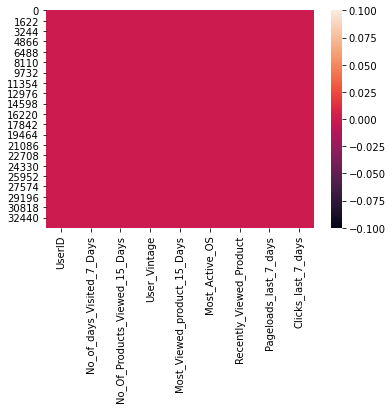

In [101]:
sns.heatmap(input_feature.isnull())

In [102]:
input_feature=input_feature.sort_values('UserID')

# Sorting based on UserID as shown in Sample Submission File

In [103]:
input_feature.head()

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
10521,U100002,0.0,2.0,52,PR100258,ANDROID,PR100258,0.0,0.0
11974,U100003,1.0,3.0,1020,PR100079,WINDOWS,PR100079,1.0,2.0
5037,U100004,1.0,16.0,340,PR101505,WINDOWS,PR101042,1.0,0.0
21202,U100005,1.0,4.0,680,PR102072,ANDROID,PR100234,1.0,1.0
33746,U100006,1.0,1.0,54,PR101111,ANDROID,PR101111,1.0,0.0


In [104]:
input_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34050 entries, 10521 to 28493
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UserID                         34050 non-null  object 
 1   No_of_days_Visited_7_Days      34050 non-null  float64
 2   No_Of_Products_Viewed_15_Days  34050 non-null  float64
 3   User_Vintage                   34050 non-null  int64  
 4   Most_Viewed_product_15_Days    34050 non-null  object 
 5   Most_Active_OS                 34050 non-null  object 
 6   Recently_Viewed_Product        34050 non-null  object 
 7   Pageloads_last_7_days          34050 non-null  float64
 8   Clicks_last_7_days             34050 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.6+ MB


In [105]:
# Converting ['No_of_days_Visited_7_Days','No_Of_Products_Viewed_15_Days','Pageloads_last_7_days','Clicks_last_7_days'] to int
# This is because in the sample File, they are presented as int.

convert=['No_of_days_Visited_7_Days','No_Of_Products_Viewed_15_Days','Pageloads_last_7_days','Clicks_last_7_days']
for col in convert:
    input_feature[col] = input_feature[col].astype(int)

In [106]:
input_feature.head()

,UserID,No_of_days_Visited_7_Days,No_Of_Products_Viewed_15_Days,User_Vintage,Most_Viewed_product_15_Days,Most_Active_OS,Recently_Viewed_Product,Pageloads_last_7_days,Clicks_last_7_days
10521,U100002,0,2,52,PR100258,ANDROID,PR100258,0,0
11974,U100003,1,3,1020,PR100079,WINDOWS,PR100079,1,2
5037,U100004,1,16,340,PR101505,WINDOWS,PR101042,1,0
21202,U100005,1,4,680,PR102072,ANDROID,PR100234,1,1
33746,U100006,1,1,54,PR101111,ANDROID,PR101111,1,0


In [107]:
input_feature.to_csv('Input_Data_Final_Submission.csv',index=False)